<a href="https://colab.research.google.com/github/lonen8188/AIStudy24/blob/master/%EA%B5%B0%EC%A7%91%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 비지도학습 : 타깃이 없는 데이터를 사용하는 것을 말함
# 타깃이 없다는 것은 정답이 없어 알고리즘이 예측을 해야 함

In [1]:
# MBC 마켓에서 이벤트를 진행하기로 하였다.
# 본인 구매한 과일 사진을 홈페이지에 업로드하면 추첨을 하여 상품을 제공하려함

# 고객이 올린 사진을 학습하여 과일을 분류 해본다.
# 비지도 학습 : Unsupervised Learning
# 사람이 가르쳐 주지않아도 데이터에 있는 무언가를 학습함

# 비법 : 사진의 픽셀값을 모두 평균내면 비슷한 과일끼리 모일까??
# 과일사진 300개를 준비하여 분류를 해보자.

!wget https://bit.ly/fruits_300_data -O fruits_300.npy
# 과일사진 데이터 준비(캐글에 공개된 데이터 셋) - 대문자0

--2025-01-08 01:34:25--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2025-01-08 01:34:25--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2025-01-08 01:34:26--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [3]:
import numpy as np
import matplotlib.pyplot as plt

fruits = np.load('fruits_300.npy')
# fruits는 넘파이 배열이고
# fruits_300.npy 파일에 들어 있는 모든 데이터를 담는다.

In [4]:
print(fruits.shape)
# 샘플개수, 이미지높이, 이미지너비 -> 과일사진300장, 해상도 100X100
# https://www.kaggle.com/ 캐글에가면 데이터셋이 많음

(300, 100, 100)


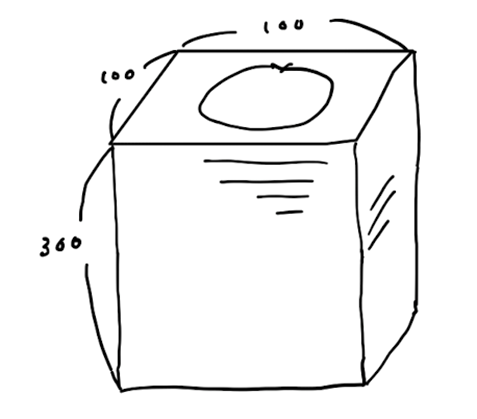

In [8]:
print(fruits[0, 0, :]) # 3차원 배열임 0번행, 0번열, 모든값
# [  1   1   1   1   1   1   1   1   1   1
#    1   1   1   1   1   1   2   1   2   2
#    2   2   2   2   1   1   1   1   1   1
#    1   1   2   3   2   1   2   1   1   1
#    1   2   1   3   2   1   3   1   4   1
#    2   5   5   5   19 148 192 117  28  1
#    1   2   1   4   1   1   3   1   1   1
#    1   1   2   2   1   1   1   1   1   1
#    1   1   1   1   1   1   1   1   1   1
#    1   1   1   1   1   1   1   1   1   1]

[  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   2   1
   2   2   2   2   2   2   1   1   1   1   1   1   1   1   2   3   2   1
   2   1   1   1   1   2   1   3   2   1   3   1   4   1   2   5   5   5
  19 148 192 117  28   1   1   2   1   4   1   1   3   1   1   1   1   1
   2   2   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1]


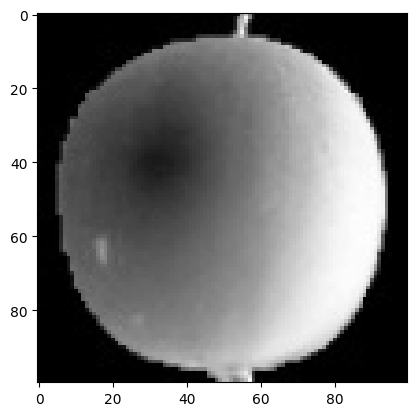

In [6]:
plt.imshow(fruits[0], cmap='gray')
plt.show() # 넘파이에서는 흑백사진을 반전시켜 보인다. (검정<->흰색)

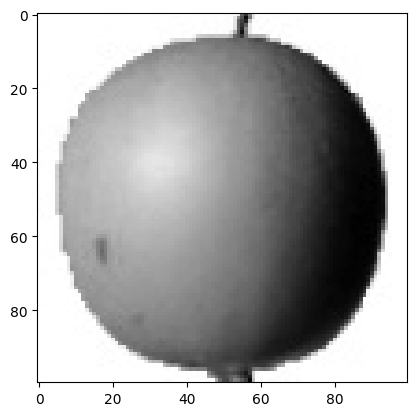

In [9]:
plt.imshow(fruits[0], cmap='gray_r') # 반전에 반전
plt.show()

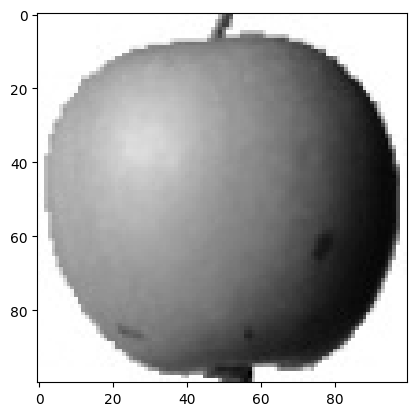

In [10]:
plt.imshow(fruits[50], cmap='gray_r') # 반전에 반전
plt.show()
# 밝은 부분은 0에 가깝다, 짙은 부분은 255에 가깝다.
# 현재 넘파이 데이터에는 사과, 바나나, 파인애플이 각 100개씩 있음

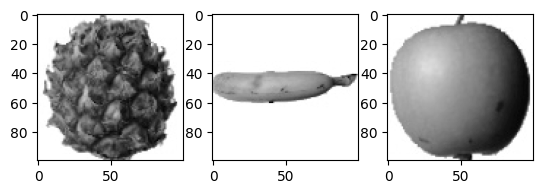

In [12]:
fig, axs = plt.subplots(1, 3)
# subplots() 함수는 맷플롯립의 함수로 여러개의 그래프를 배열처럼 쌓을 수 있도록 도와줌
# subplots(1,2) 하나의 행과 2개의 열 -> 반환되는 axs는 2개의 서브 그래프를 담고 있는 배열임

axs[0].imshow(fruits[100], cmap='gray_r')
axs[1].imshow(fruits[200], cmap='gray_r')
axs[2].imshow(fruits[50], cmap='gray_r')
# axs[0]에 파인애플 이미지를, axs[1]에 바나나 이미지를 그림
plt.show()

In [13]:
# 픽셀값 분석하기 위해 넘파이 배열을 나눌때 100X100 이미지를 펼쳐서 10,000인 1차원 배열로 만듬

apple = fruits[0:100].reshape(-1, 100*100)
pineapple = fruits[100:200].reshape(-1, 100*100)
banana = fruits[200:300].reshape(-1, 100*100)

# fruits 배열에서 순서대로 100개씩 선택하기 위해 슬라이싱 연산자를 활용
# reshape() 메서드를 이용해서 두번째 차원(가로) 100, 세번째 차원(세로) 100을 곱해 10,000개를 만듬
# reshape(-1, )로 지정하면 자동으로 남은 차원을 할당한다. (첫번째 차원이 샘플 개수)
print(apple.shape) # 100개의 객체에 10000개의 값

(100, 10000)


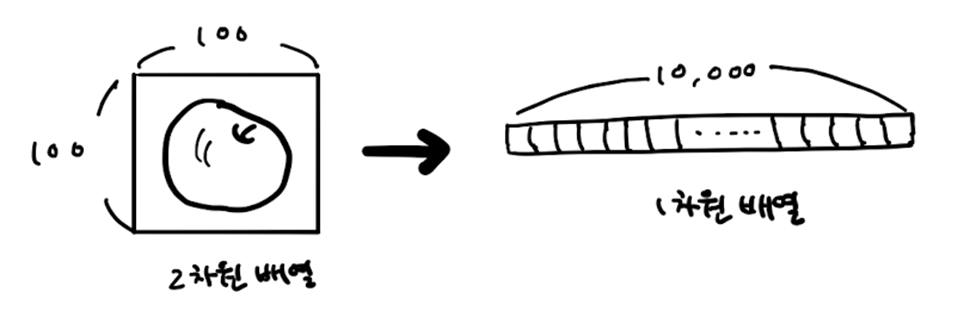

In [14]:
print(pineapple.shape) # 파인애플 100개의 자료

(100, 10000)


In [15]:
print(banana.shape) # 바나나 100개의 자료

(100, 10000)


In [16]:
# mean() 평균 구하는 함수
# axis 중심선(배열의 축) axis=0 행을 따라 계산, axis=1은 열을 따라 계산
# 우리가 필요한 것은 샘플의 평균값 (샘플을 모두 가로로 값을 나열 했으니 axis=1)
print(apple.mean(axis=1)) # 8 x 12 + 4 = 100개 -> 사과 하나하나에 대한 픽셀의 평균임

[ 88.3346  97.9249  87.3709  98.3703  92.8705  82.6439  94.4244  95.5999
  90.681   81.6226  87.0578  95.0745  93.8416  87.017   97.5078  87.2019
  88.9827 100.9158  92.7823 100.9184 104.9854  88.674   99.5643  97.2495
  94.1179  92.1935  95.1671  93.3322 102.8967  94.6695  90.5285  89.0744
  97.7641  97.2938 100.7564  90.5236 100.2542  85.8452  96.4615  97.1492
  90.711  102.3193  87.1629  89.8751  86.7327  86.3991  95.2865  89.1709
  96.8163  91.6604  96.1065  99.6829  94.9718  87.4812  89.2596  89.5268
  93.799   97.3983  87.151   97.825  103.22    94.4239  83.6657  83.5159
 102.8453  87.0379  91.2742 100.4848  93.8388  90.8568  97.4616  97.5022
  82.446   87.1789  96.9206  90.3135  90.565   97.6538  98.0919  93.6252
  87.3867  84.7073  89.1135  86.7646  88.7301  86.643   96.7323  97.2604
  81.9424  87.1687  97.2066  83.4712  95.9781  91.8096  98.4086 100.7823
 101.556  100.7027  91.6098  88.8976]


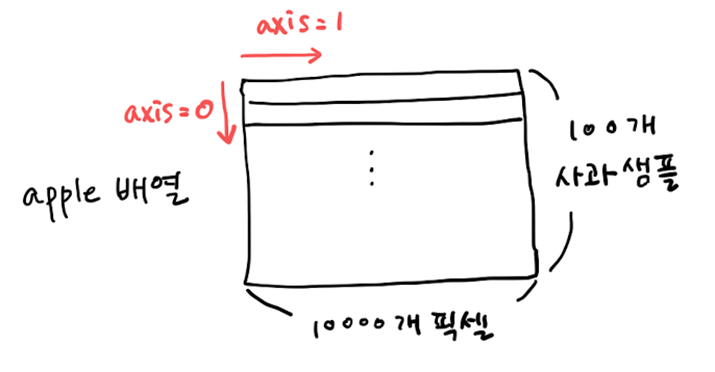

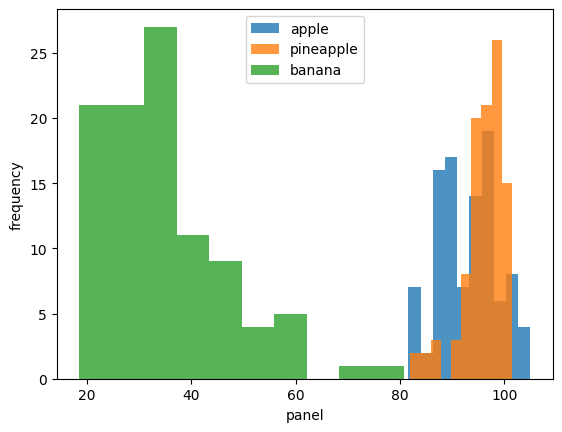

In [18]:
# 히스토그램 : 값이 발생한 빈도를 그래프로 표시함
# x축이 값의 구간(계급), y축은 발생빈도(도수)(막대 그래프)
plt.hist(np.mean(apple, axis=1), alpha=0.8) # alpha=1이면 불투명, 낮으면 투명도
plt.hist(np.mean(pineapple, axis=1), alpha=0.8)
plt.hist(np.mean(banana, axis=1), alpha=0.8)
plt.legend(['apple', 'pineapple', 'banana']) # 범례(순서대로)
plt.xlabel('panel') # 구간
plt.ylabel('frequency') # 빈도
plt.show()
# 바나나는 길고 사과나 파인애플은 둥글기에 평균값이 차이남
# 바나나 사진은 평균이 40점에 집중되어 있고 사과와 파인애플은 90~100사이에 많이 있다.
# 바나나가 길어서 공간이 많음, 사과와 파인애플은 둥글기 때문에 공간이 많이 없다.

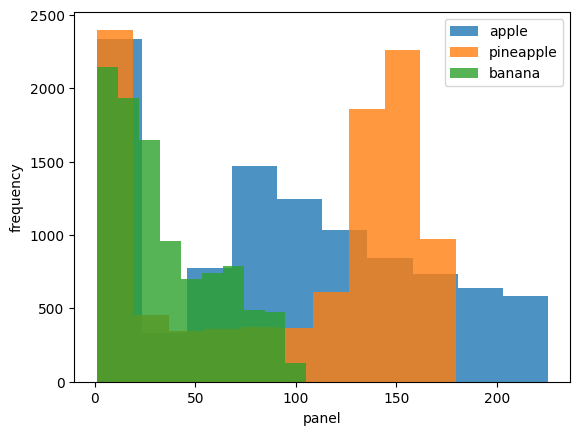

In [19]:
# 개선해보기위해서 axis=0으로 변경해보면 어떨까?
plt.hist(np.mean(apple, axis=0), alpha=0.8) # alpha=1이면 불투명, 낮으면 투명도
plt.hist(np.mean(pineapple, axis=0), alpha=0.8)
plt.hist(np.mean(banana, axis=0), alpha=0.8)
plt.legend(['apple', 'pineapple', 'banana']) # 범례(순서대로)
plt.xlabel('panel') # 구간
plt.ylabel('frequency') # 빈도
plt.show()

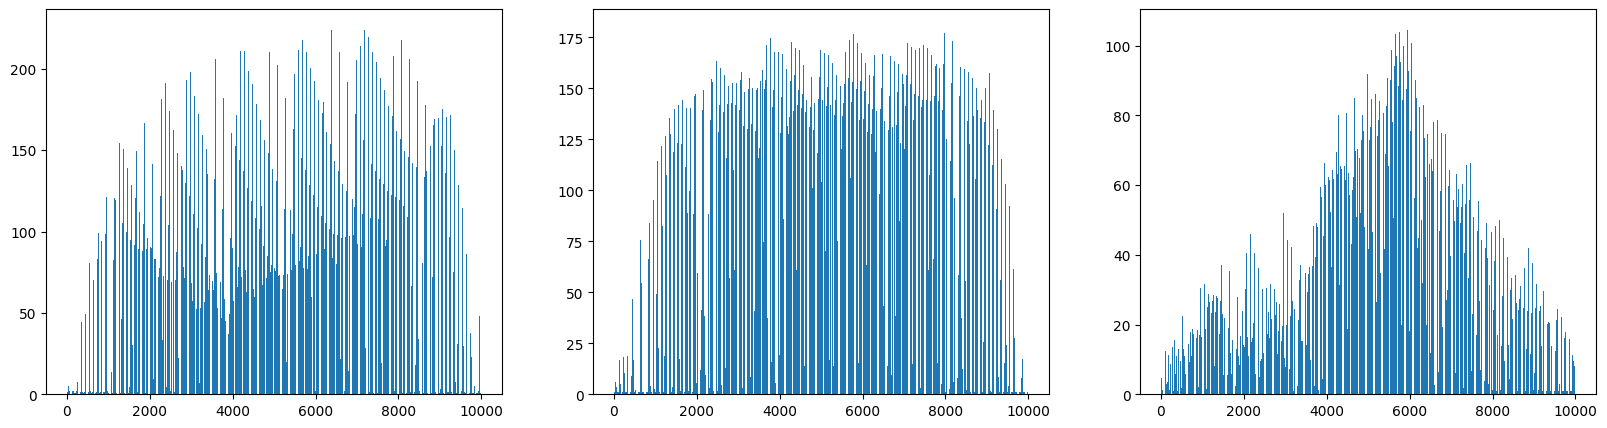

In [20]:
# 샘플의 평균 값이 아니라 픽셀별 평균값을 비교해보자! (픽셀값이 높은 위치가 조금 다름)
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs[0].bar(range(10000), np.mean(apple, axis=0))
axs[1].bar(range(10000), np.mean(pineapple, axis=0))
axs[2].bar(range(10000), np.mean(banana, axis=0))
plt.show()# (세로 슬라이스 모양과 유사)
#           사과 ,                       파인애플,                      바나나 순

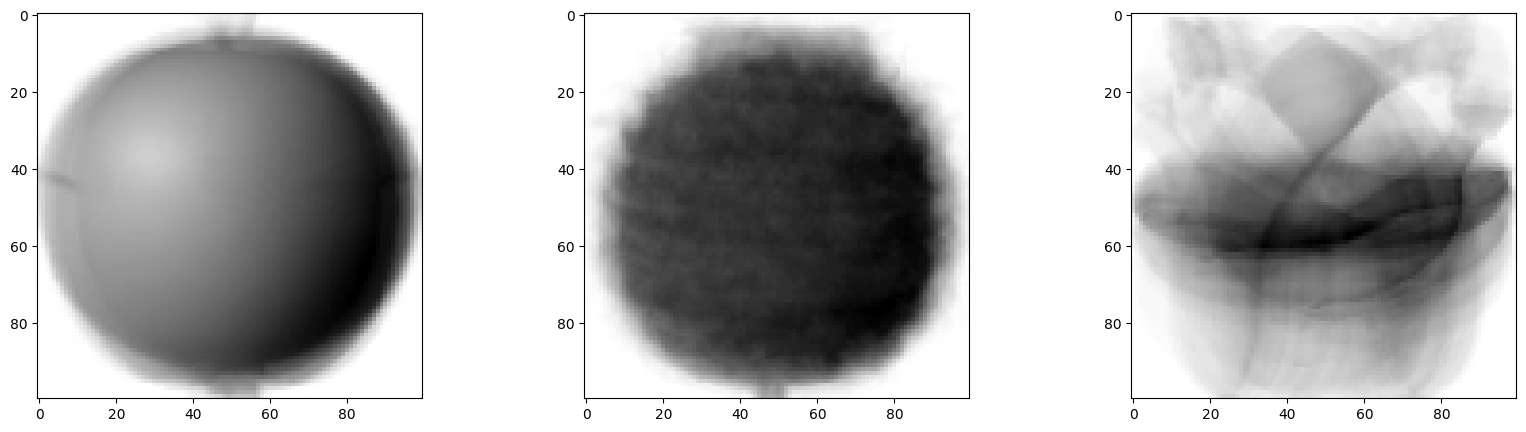

In [21]:
# 픽셀의 평균값을 100x100으로 바꾸고 이미지처럼 출력
apple_mean = np.mean(apple, axis=0).reshape(100, 100)
pineapple_mean = np.mean(pineapple, axis=0).reshape(100, 100)
banana_mean = np.mean(banana, axis=0).reshape(100, 100)

fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs[0].imshow(apple_mean, cmap='gray_r')
axs[1].imshow(pineapple_mean, cmap='gray_r')
axs[2].imshow(banana_mean, cmap='gray_r')
plt.show()

In [22]:
# 평균값과 가까운 사진 고르기

abs_diff = np.abs(fruits - apple_mean)
# apple_mean과 가장 가까운 사진을 고르기 위해서 절대값 오차를 사용해보겠다.
# 넘파이 abs()는 절대값을 계산하는 함수임 -> 절대값은 -를 없앰 (np.abs(-1) -> 1)

abs_mean = np.mean(abs_diff, axis=(1,2))
# 배열에 사용하면 모든 원소의 절대값을 계산하여 입력과 동일한 크기의 배열을 반환
# np.abs와 np.absolute()는 유사함
# abs_diff는 300, 100, 100 크기의 배열임
# 각 샘플에 대한 평균을 구하기 위해 axis에 두번째, 세번째 차원을 모두 지정함

print(abs_mean.shape)

# 이렇게 계산한 abs_mean은 각 샘플의 오차 평균임 -> 크기(300,)인 1차원 배열

(300,)


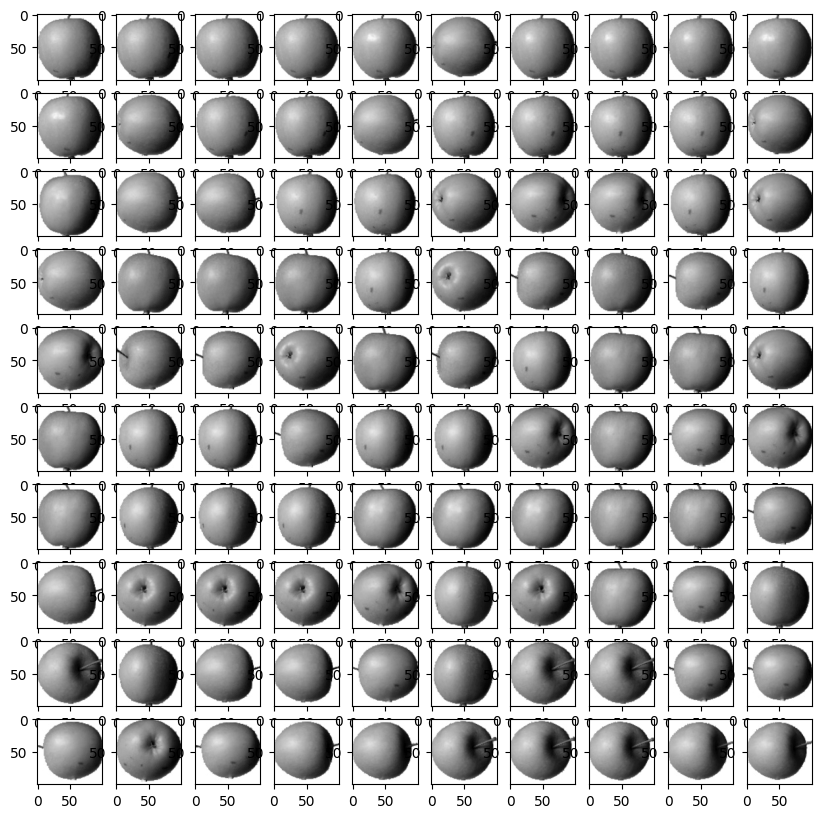

In [23]:
# 이 값이 가장 작은 순서대로 100개를 골라 보겠음
# -> apple_mean과 오차가 가장 작은 샘플 100개를 고름
# np.argsort() 함수는 작은 것에서 큰 순서대로 내열한 abs_mean 배열의 인덱스를 반환
# 이 인덱스 중에서 처음 100개를 선택해 10*10 격자로 이루어진 그래프를 그려봄
apple_index = np.argsort(abs_mean)[:100]
fig, axs = plt.subplots(10, 10, figsize=(10,10))
# subplots() 10x10, 총 100개의 서브 그래프를 만듬
# figsize=(10,10) 그래프 크기를 조정 -> figsize(8,6) 기본값

# 2중 for문으로 10의 행과 열에 이미지를 출력
for i in range(10):
    for j in range(10):
        axs[i, j].imshow(fruits[apple_index[i*10 + j]], cmap='gray_r')
# axs는 (10,10) 크기의 2차원배열임으로 i,j 두 첨자를 사용해 서브 그래프 위치를 지정
#axs[i, j].axis('off') # 깔끔한 이미지만 그리기위해 axis off 설정 (축 표시 끔)

plt.show()

In [ ]:
# 지금까지 흑백사진을 이용해 픽셀값을 사용하고 과일 사진을 모으는 작업을 진행함
# 이렇게 비슷한 샘플끼리 그룹으로 모으는 작업을 클러스터링(군집)이라고 함
# 군집 알고리즘에서 만든 그룹을 클러스터라고 부름

# 지금까지는 사과, 파인애플, 바나나가 있다는 것을 알고 있었음으로 타깃 값을 알고 접근함
# 실제 비지도 학습에서는 타깃값을 모르는 것이 대부분 -> 샘플 평균값을 미리 구할 수 없음

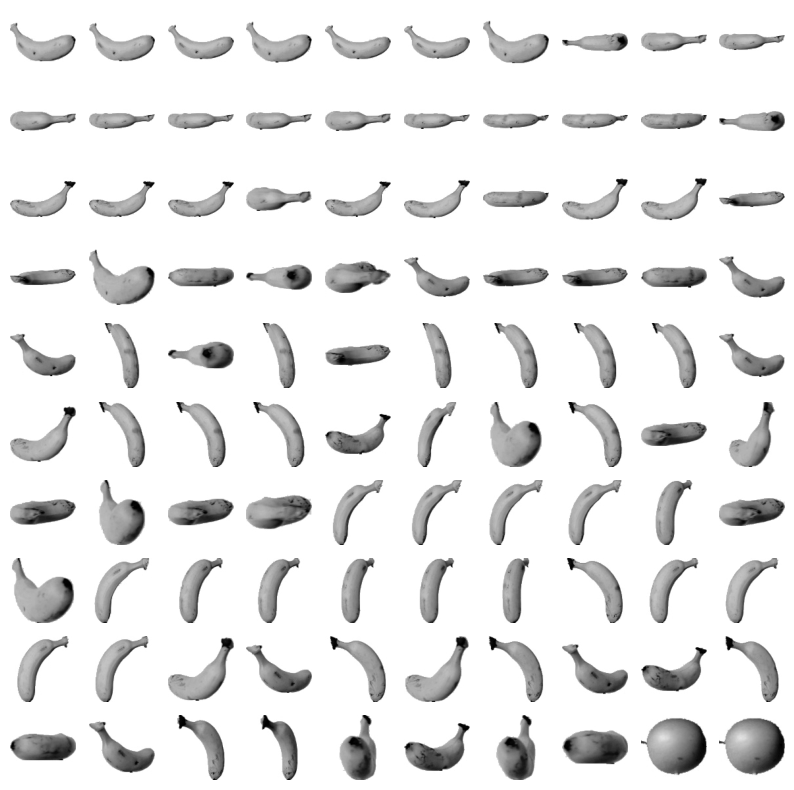

In [24]:
# 바나나를 찾아보자.
abs_diff = np.abs(fruits - banana_mean)
abs_mean = np.mean(abs_diff, axis=(1,2))

banana_index = np.argsort(abs_mean)[:100]
fig, axs = plt.subplots(10, 10, figsize=(10,10))
for i in range(10):
    for j in range(10):
        axs[i, j].imshow(fruits[banana_index[i*10 + j]], cmap='gray_r')
        axs[i, j].axis('off')
plt.show()

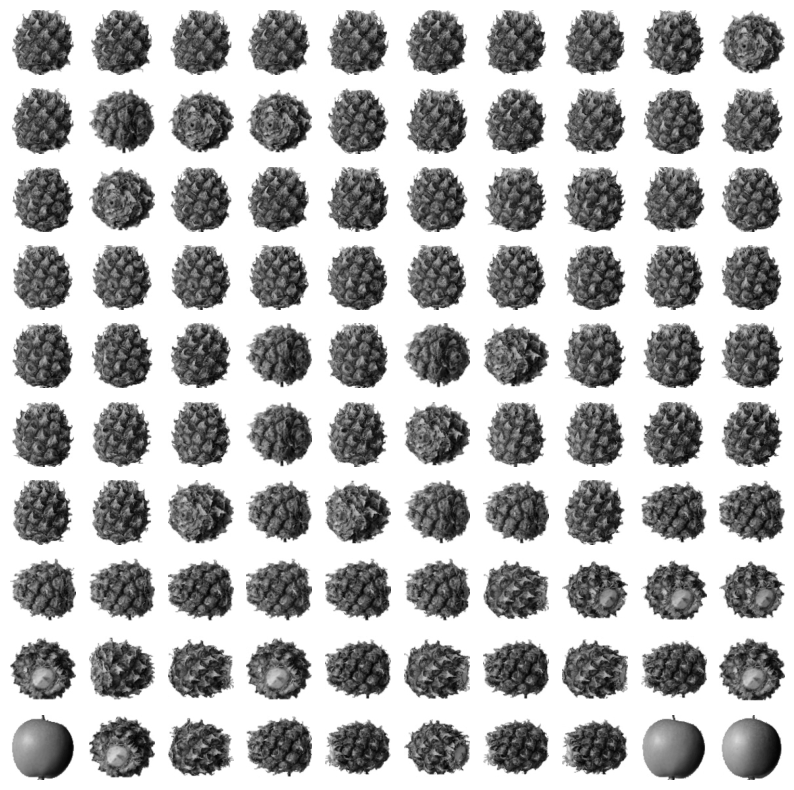

In [25]:
abs_diff = np.abs(fruits - pineapple_mean)
abs_mean = np.mean(abs_diff, axis=(1,2))

banana_index = np.argsort(abs_mean)[:100]
fig, axs = plt.subplots(10, 10, figsize=(10,10))
for i in range(10):
    for j in range(10):
        axs[i, j].imshow(fruits[banana_index[i*10 + j]], cmap='gray_r')
        axs[i, j].axis('off')
plt.show()